In [1]:
# using DelimitedFiles:readdlm
using GWSC

# using Interpolations

┌ Info: Recompiling stale cache file /home/bear/.julia/compiled/v1.1/GWSC/HpzGr.ji for GWSC [13605eb4-7e26-11e9-1115-f51d9e886ef4]
└ @ Base loading.jl:1184


In [2]:
# include("LIGO.jl")

# total observation time of LIGO O1 and O2
TObs = 165.6/365.25;

# TObs = 10.
det = LIGO(name="LIGO_O1", TObs=TObs);

UndefVarError: UndefVarError: LIGO not defined

In [115]:
using QuadGK
using Roots
using PyPlot

Ωgw(r::Float, nt::Float) = f -> 1.09r*10^(10nt - 15)*(f*big(YEAR))^nt

Ωgw (generic function with 1 method)

In [116]:
ρTh = 1
SNREq(nt) = r -> (SNR(det, Ωgw(r, nt)) - ρTh)

SNREq (generic function with 1 method)

In [117]:
ntOfr(nt) = find_zero(SNREq(nt), (1e-150, 1e200))

ntOfr (generic function with 1 method)

In [118]:
@time ntOfr(-4.), 6.522865274308692e82

  2.713803 seconds (17.00 M allocations: 750.354 MiB, 10.14% gc time)


(6.522865274308692e82, 6.522865274308692e82)

In [122]:
24318.499857/3600

6.755138849166666

In [119]:
nts = -4.0:1e-2:6.0
@time rs = ntOfr.(nts);

24318.499857 seconds (46.51 G allocations: 1.875 TiB, 2.92% gc time)


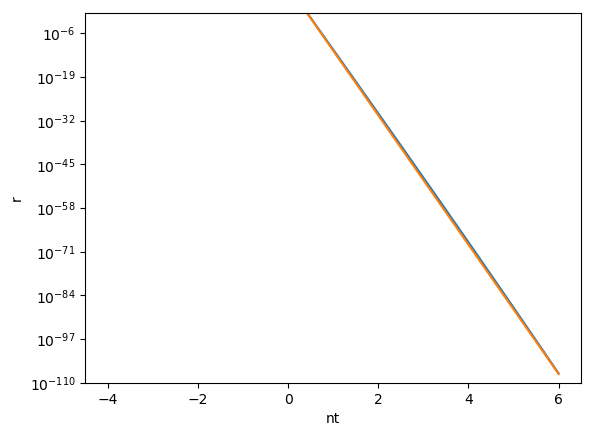

In [144]:
# test(x) = r0 * 10^(-16(x-6))
# test1(x) = 4.053368761221616e-108 * 10^(-19.25(x-6))
test1(x) = 1.28e8*10^(-19.25x)
# test2(x) = 1.2817877482035493e-108 * 10^(-19(x-6))
ys = test1.(nts)
plot(nts, rs)
plot(nts, ys)
xlabel("nt")
ylabel("r")
semilogy()
ylim(1e-110, 1)
show()

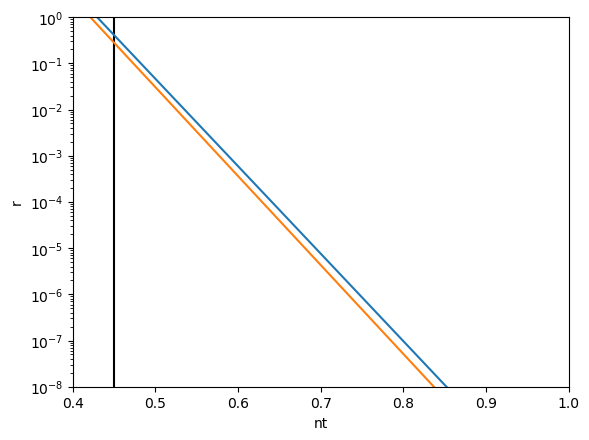

In [167]:
plot(nts, rs)
plot(nts, ys)
xlabel("nt")
ylabel("r")
semilogy()
ylim(1e-8, 1)
xlim(0.4, 1)
vlines(0.45, 1e-8, 1)
show()